In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import os
print(os.getcwd())

C:\Users\h\Desktop\Kifiya_AI_mastering\notebooks\ass


In [12]:
data=pd.read_csv(r'C:\Users\h\Desktop\Kifiya_AI_mastering\notebooks\ass\solar-measurements_sierraleone-kenema_qc.csv',encoding='ISO-8859-1'
            )
print(data.head())

C:\Users\h\AppData\Local\Temp\ipykernel_12612\2843529292.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r'C:\Users\h\Desktop\Kifiya_AI_mastering\notebooks\ass\solar-measurements_sierraleone-kenema_qc.csv',encoding='ISO-8859-1'


          Timestamp   GHI   DNI   DHI  ModA  ModB  Tamb    RH   WS WSgust  \
0  yyyy-mm-dd hh:mm  W/m²  W/m²  W/m²  W/m²  W/m²    °C     %  m/s    m/s   
1  2021-11-18 00:01    -1  -0.3    -1     0     0  24.1  98.8  0.1    0.7   
2  2021-11-18 00:02    -1  -0.3  -0.9     0     0  24.1  98.8  0.6    1.4   
3  2021-11-18 00:03    -1  -0.3  -0.9     0     0  24.1  98.9  0.1    1.1   
4  2021-11-18 00:04    -1  -0.2    -1     0     0  24.1  98.9  0.2    1.1   

  WSstdev            WD WDstdev   BP Cleaning Precipitation TModA TModB  \
0     m/s  °N (to east)       °  hPa   1 or 0        mm/min    °C    °C   
1     0.4         206.5     1.3  996        0             0  24.2  24.3   
2     0.6           218       7  996        0             0  24.2  24.3   
3     0.4         211.9     0.7  996        0             0  24.2  24.3   
4     0.4         220.3     1.5  996        0             0  24.2  24.3   

  Comments  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


In [13]:
data = data.fillna(0)
numeric_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=numeric_columns)
print(data.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
1  2021-11-18 00:01 -1.0 -0.3 -1.0   0.0   0.0  24.1  98.8  0.1     0.7   
2  2021-11-18 00:02 -1.0 -0.3 -0.9   0.0   0.0  24.1  98.8  0.6     1.4   
3  2021-11-18 00:03 -1.0 -0.3 -0.9   0.0   0.0  24.1  98.9  0.1     1.1   
4  2021-11-18 00:04 -1.0 -0.2 -1.0   0.0   0.0  24.1  98.9  0.2     1.1   
5  2021-11-18 00:05 -1.0 -0.2 -1.0   0.0   0.0  24.2  99.0  0.4     1.4   

   WSstdev     WD  WDstdev     BP  Cleaning  Precipitation  TModA  TModB  \
1      0.4  206.5      1.3  996.0       0.0            0.0   24.2   24.3   
2      0.6    218      7.0  996.0       0.0            0.0   24.2   24.3   
3      0.4  211.9      0.7  996.0       0.0            0.0   24.2   24.3   
4      0.4  220.3      1.5  996.0       0.0            0.0   24.2   24.3   
5      0.6  214.5      4.2  996.0       0.0            0.0   24.2   24.4   

  Comments  
1        0  
2        0  
3        0  
4        0  
5        0  


In [46]:
summary_stats = data.describe()
print(summary_stats)

              GHI
count    4.000000
mean   587.500000
std     29.860788
min    550.000000
25%    572.500000
50%    590.000000
75%    605.000000
max    620.000000


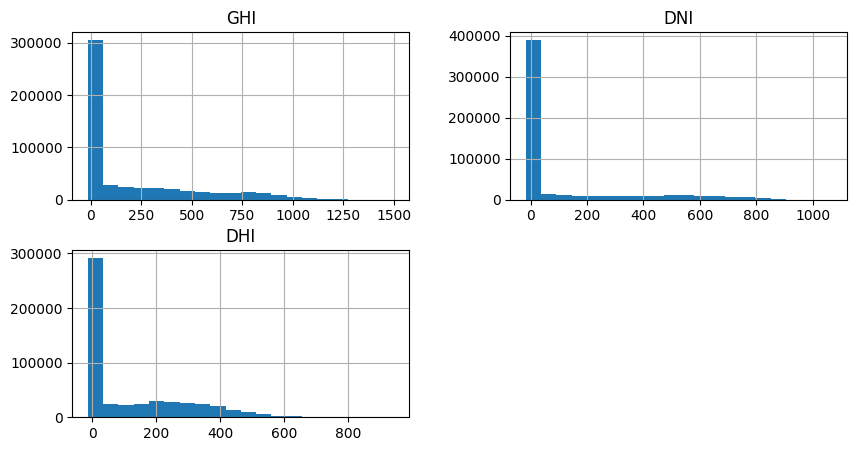

In [15]:
data.hist(column=['GHI', 'DNI', 'DHI'], bins=20, figsize=(10, 5))
plt.show()

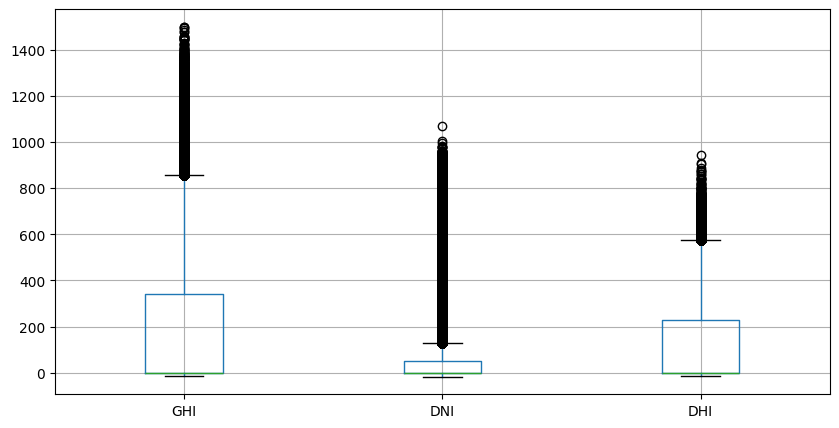

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt

data.boxplot(column=['GHI', 'DNI', 'DHI'], figsize=(10, 5))
plt.show()


In [26]:
data = data.dropna(subset=numeric_columns)

In [22]:
high_solar_areas = data[(data['GHI'] > data['GHI'].mean()) & (data['DNI'] > data['DNI'].mean())]
print(high_solar_areas)


               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
630     2021-11-18 10:30   902.0  430.6  568.0   991.0   958.0  27.0  90.2   
631     2021-11-18 10:31  1015.0  513.5  614.9  1093.0  1058.0  27.0  90.1   
632     2021-11-18 10:32  1009.0  566.5  567.8  1079.0  1045.0  27.0  90.3   
633     2021-11-18 10:33   705.7  260.6  496.7   730.7   706.1  27.1  89.8   
634     2021-11-18 10:34   519.7  116.7  427.4   550.3   534.0  27.2  90.2   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
525181  2022-11-17 17:01   228.2  297.7  133.8   219.1   205.5  31.8  57.8   
525182  2022-11-17 17:02   225.0  293.1  133.0   216.0   202.6  31.8  58.6   
525183  2022-11-17 17:03   224.9  299.4  132.2   215.9   202.5  31.9  57.9   
525184  2022-11-17 17:04   224.9  306.0  131.5   215.7   202.3  31.9  57.4   
525185  2022-11-17 17:05   217.0  289.4  129.6   207.8   195.0  31.8  57.4   

         WS  WSgust  WSstdev    WD  WDstdev     BP  Cleaning  P

In [23]:
temp_humidity_analysis = high_solar_areas[['Tamb', 'RH']].describe()
print(temp_humidity_analysis)


                Tamb             RH
count  112736.000000  112736.000000
mean       30.358751      64.300138
std         3.157937      14.915114
min        17.300000      18.500000
25%        28.200000      54.700000
50%        30.700000      65.700000
75%        32.800000      75.100000
max        38.400000     100.000000


In [27]:
suitable_regions = high_solar_areas[['GHI', 'DNI', 'Tamb', 'RH']]
print(suitable_regions)

           GHI    DNI  Tamb    RH
630      902.0  430.6  27.0  90.2
631     1015.0  513.5  27.0  90.1
632     1009.0  566.5  27.0  90.3
633      705.7  260.6  27.1  89.8
634      519.7  116.7  27.2  90.2
...        ...    ...   ...   ...
525181   228.2  297.7  31.8  57.8
525182   225.0  293.1  31.8  58.6
525183   224.9  299.4  31.9  57.9
525184   224.9  306.0  31.9  57.4
525185   217.0  289.4  31.8  57.4

[112736 rows x 4 columns]


In [29]:
print(data['Timestamp'].head())

0    yyyy-mm-dd hh:mm
1    2021-11-18 00:01
2    2021-11-18 00:02
3    2021-11-18 00:03
4    2021-11-18 00:04
Name: Timestamp, dtype: object


In [34]:

data = data[data['Timestamp'] != "yyyy-mm-dd hh:mm"]

In [35]:
data['Timestamp'] = data['Timestamp'].replace("yyyy-mm-dd hh:mm", pd.NaT)


In [36]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')


In [37]:
invalid_rows = data[data['Timestamp'].isna()]
print(invalid_rows)

  Timestamp   GHI   DNI   DHI  ModA  ModB Tamb RH   WS WSgust WSstdev  \
0       NaT  W/m²  W/m²  W/m²  W/m²  W/m²   °C  %  m/s    m/s     m/s   

             WD WDstdev   BP Cleaning Precipitation TModA TModB Comments  
0  °N (to east)       °  hPa   1 or 0        mm/min    °C    °C      NaN  


In [38]:
data = data.dropna(subset=['Timestamp'])

In [40]:
import pandas as pd
data = pd.DataFrame({
    'Timestamp': ['yyyy-mm-dd hh:mm', '2021-11-18 00:01', '2021-11-18 00:02', '2021-11-18 00:03', '2021-11-18 00:04'],
    'GHI': [500, 600, 550, 580, 620]
})
data = data[data['Timestamp'] != "yyyy-mm-dd hh:mm"]

data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data = data.dropna(subset=['Timestamp'])
data.set_index('Timestamp', inplace=True)
print(data)


                     GHI
Timestamp               
2021-11-18 00:01:00  600
2021-11-18 00:02:00  550
2021-11-18 00:03:00  580
2021-11-18 00:04:00  620


In [49]:
import matplotlib.pyplot as plt